./5.jpg


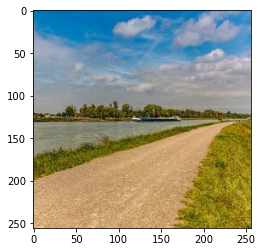

In [83]:
from CycleGAN import *
import matplotlib.pyplot as plt
from PIL import Image

from torchvision.transforms import ToTensor, ToPILImage
import torchvision.transforms as transforms
from torchvision.utils import make_grid


cuda = torch.cuda.is_available()
Tensor = torch.cuda.FloatTensor if cuda else torch.Tensor
G_AB, G_BA = torch.load("./weights/G_AB.pt"), torch.load("./weights/G_BA.pt")

# torchvision.transforms.ToTensor
tf_toTensor = ToTensor() 

transforms_ = transforms.Compose([
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


def sample_images(real_A, real_B, figside=4):
    #assert real_A.size() == real_B.size(), 'The image size for two domains must be the same'
    print(real_A.size())
    G_AB.eval()
    G_BA.eval()

    real_A = real_A.type(Tensor)
    print(real_A.size())
    print(real_B.size())
    fake_B = G_AB(real_A).detach()
    #real_B = real_B.type(Tensor)
    fake_A = G_BA(fake_B).detach()
    
    #nrows = real_A.size(0)
    real_A = make_grid(real_A, nrow=0, normalize=True)
    fake_B = make_grid(fake_B, nrow=1, normalize=True)
    # real_B = make_grid(real_B, nrow=nrows, normalize=True)
    fake_A = make_grid(fake_A, nrow=2, normalize=True)
    
    image_grid = torch.cat((real_A, fake_B, fake_A), 1).cpu().permute(1, 2, 0)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(image_grid)
    plt.axis('off')
    plt.show()


file_A = os.path.join("./" + "5.jpg")
print(file_A)
img_A = Image.open(file_A)
plt.figure()
plt.imshow(img_A)

img_A = transforms_(img_A)
img_A = img_A.unsqueeze(0)

torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


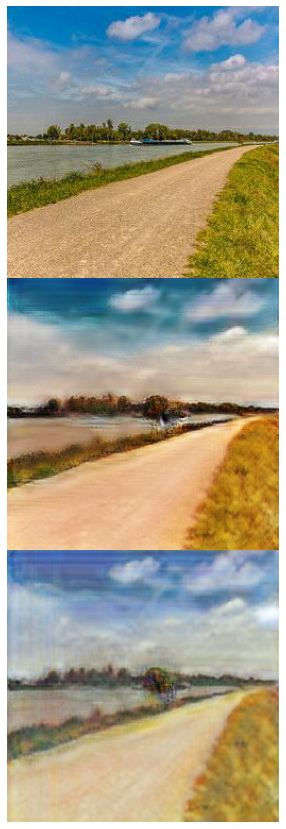

In [84]:
sample_images(img_A,img_A)